In [1]:
import pandas as pd

# Q1 loading the dataset and specially this one is from kaggle

In [2]:
df=pd.read_csv("/content/Freshly_cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,airline,from,to,price,class_category,class,day,month,flight_no,...,airline_index,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category
0,0,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8709,...,4,14,130,0,Non-stop,0,Night Arrival,1,Daytime Departure,February
1,1,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8157,...,4,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
2,2,AirAsia,Delhi,Mumbai,5956,Economy,0,11,2,I5-764,...,1,14,130,0,Non-stop,1,Daytime Arrival,0,Night Departure,February
3,3,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-995,...,7,14,135,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
4,4,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-963,...,7,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February


In [4]:
df.isnull().sum()

Unnamed: 0              0
airline                 0
from                    0
to                      0
price                   0
class_category          0
class                   0
day                     0
month                   0
flight_no               0
route                   0
dep_hour                0
arr_hour                0
dep_period              0
arr_period              0
airline_index           0
route_index             0
duration_in_min         0
stops                   0
stops_category          0
arr_daytime             0
arr_daytime_category    0
dep_daytime             0
dep_daytime_category    0
month_category          0
dtype: int64

#Q2  Numbers of row and columns

In [5]:
row,column=df.shape
print("Number of rows are ",row," and Number of columns are",column)

Number of rows are  300257  and Number of columns are 25


#Q3 visualization of flight price

Here is the visualization of price as per the flight


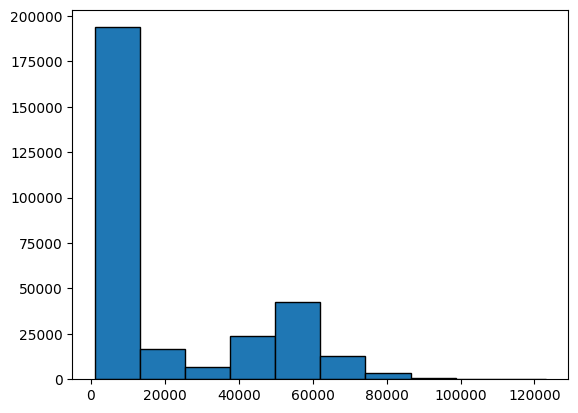

In [6]:
import matplotlib.pyplot as plt
plt.hist(df["price"],edgecolor="black")
print("Here is the visualization of price as per the flight")

In [7]:
df.columns

Index(['Unnamed: 0', 'airline', 'from', 'to', 'price', 'class_category',
       'class', 'day', 'month', 'flight_no', 'route', 'dep_hour', 'arr_hour',
       'dep_period', 'arr_period', 'airline_index', 'route_index',
       'duration_in_min', 'stops', 'stops_category', 'arr_daytime',
       'arr_daytime_category', 'dep_daytime', 'dep_daytime_category',
       'month_category'],
      dtype='object')

In [8]:
maximum=df["price"].max()
minimum=df["price"].min()
print ("Maximum price is",maximum ,"and mimnimum price is",minimum)

Maximum price is 123071 and mimnimum price is 1105


<Axes: xlabel='price', ylabel='airline'>

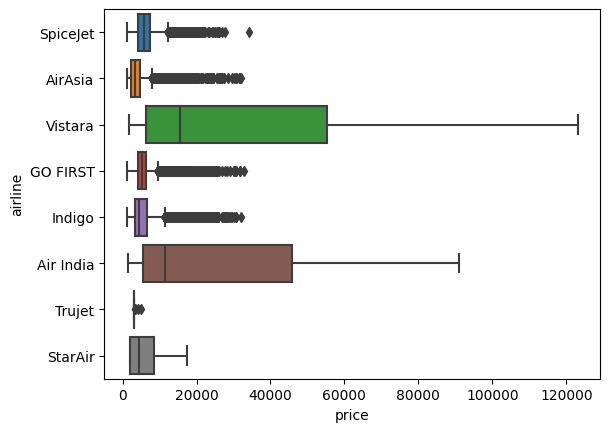

In [9]:
import seaborn as sns
sns.boxplot(data=df,x= "price", y="airline" )


#Q5 Yes Here we have many outliers in price column,in the below section i will be explaining the effect due to outliers.

Potential Impact of Outliers on Analysis:
Consider the potential impact of outliers on your analysis based on the scenario:

Misleading Pricing Perception: Outliers can distort the perceived pricing range for each airline. A single extremely high-priced ticket might lead you to think that an airline is generally expensive, even if most of its prices are reasonable.

Biased Average Calculations: Outliers can skew average price calculations. If an airline has a few extremely high-priced tickets, the average price might be much higher than what most customers actually pay.

Pricing Strategy Misinterpretation: An outlier could be indicative of a specific event, like a special promotion or a high-demand period. Treating such an outlier as a general pricing trend might lead to incorrect interpretation of an airline's pricing strategy.

Impact on Model Performance: If you're building predictive models to estimate flight prices, outliers could lead to inaccurate predictions. Models might overemphasize the influence of outliers, making predictions less accurate for typical scenarios.

Strategic Decisions: Airlines might make pricing decisions based on historical data analysis. Outliers could lead to suboptimal pricing decisions if they are not properly identified and handled.

#Q6 Showing the peak month

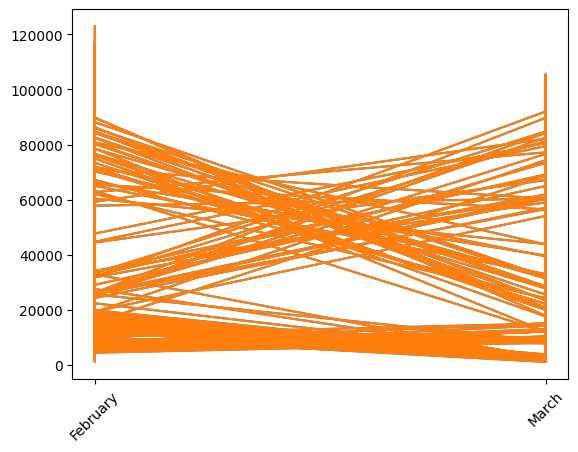

In [10]:
for mon in df["month_category"].unique():
  plt.plot(df["month_category"],df["price"],label = mon)
  plt.xticks(rotation=45)


In [11]:
#df.groupby(['month_category'])['price'].nlargest(3)
x=df['month_category']
y=df['price']
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300252    69265
300253    77105
300254    79099
300255    81585
300256    81585
Name: price, Length: 300257, dtype: int64

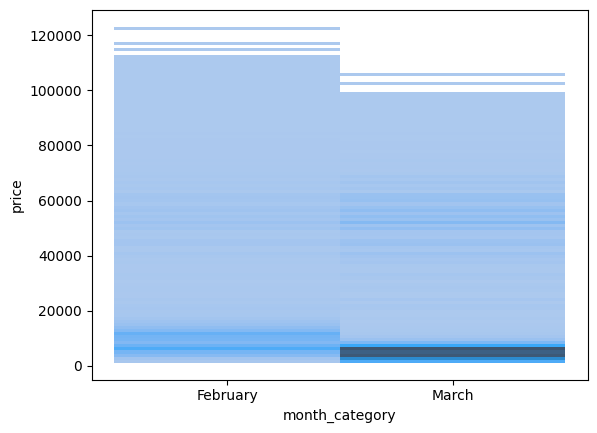

In [12]:
import seaborn as sns
for mon_2 in df.groupby(['month_category'])['price'].nlargest(12):
  data=df.groupby(['month_category'])['price'].nlargest(12)
  sns.histplot(data=data,x=df['month_category'],y=df['price'],label=mon_2)

  #print(mon_2)
  #sns.lineplot(data=df )

#Q7


In [13]:
df.columns

Index(['Unnamed: 0', 'airline', 'from', 'to', 'price', 'class_category',
       'class', 'day', 'month', 'flight_no', 'route', 'dep_hour', 'arr_hour',
       'dep_period', 'arr_period', 'airline_index', 'route_index',
       'duration_in_min', 'stops', 'stops_category', 'arr_daytime',
       'arr_daytime_category', 'dep_daytime', 'dep_daytime_category',
       'month_category'],
      dtype='object')

In [14]:
airline=df[df['airline'] == 'SpiceJet'].isnull().sum()
len(airline)

25

In [15]:
df.columns

Index(['Unnamed: 0', 'airline', 'from', 'to', 'price', 'class_category',
       'class', 'day', 'month', 'flight_no', 'route', 'dep_hour', 'arr_hour',
       'dep_period', 'arr_period', 'airline_index', 'route_index',
       'duration_in_min', 'stops', 'stops_category', 'arr_daytime',
       'arr_daytime_category', 'dep_daytime', 'dep_daytime_category',
       'month_category'],
      dtype='object')

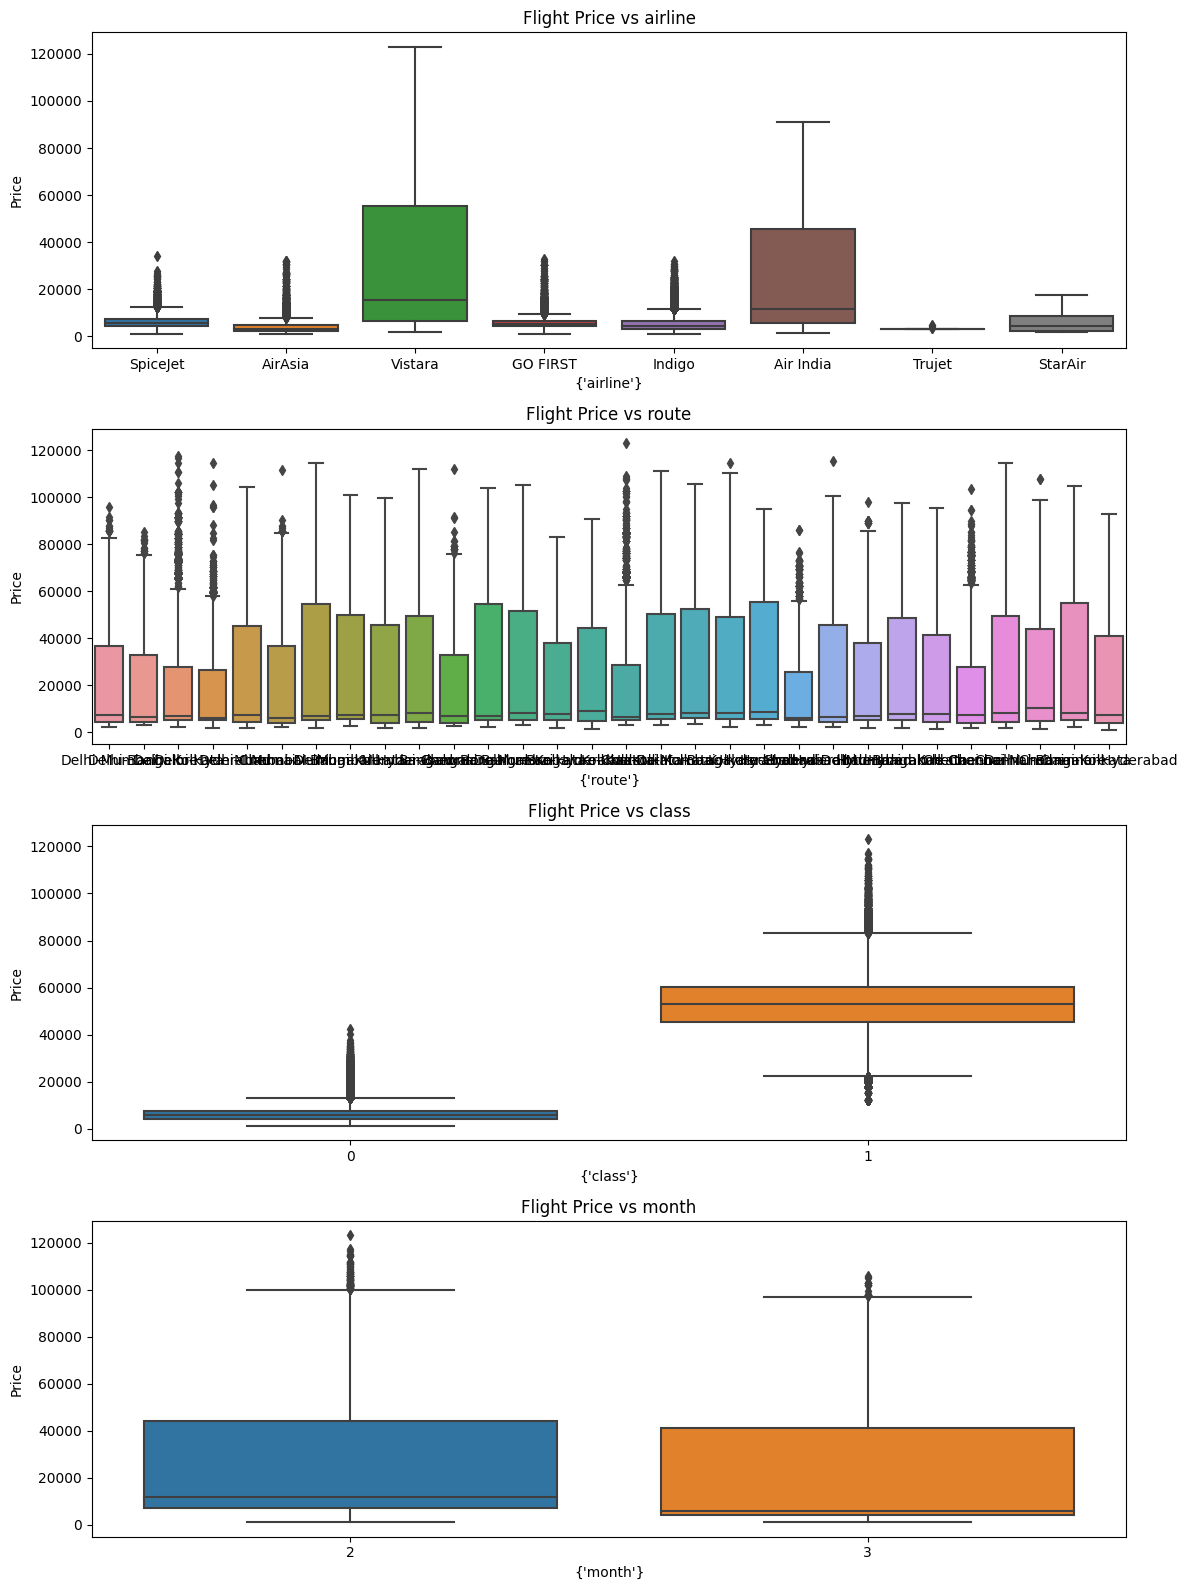

In [17]:
from matplotlib import figure
y=df["airline"].unique()
#print(len(y),y)
features_to_analyze = ['airline', 'route', 'class', 'month']

# Create subplots
num_subplots = len(features_to_analyze)
fig, axes = plt.subplots(num_subplots, 1, figsize=(12, 4*num_subplots))

# Loop through each feature and create subplots
for i, feature in enumerate(features_to_analyze):
    sns.boxplot(x=feature, y='price', data=df, ax=axes[i])
    axes[i].set_title(f'Flight Price vs {feature}')
    axes[i].set_ylabel('Price')
    axes[i].set_xlabel({feature})

plt.tight_layout()
plt.show()
#for feature in y:
   # sns.boxplot(x=feature, y='Price', data=df)

